Asian and Indian Cuisines

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [267]:
!pip install imblearn

In [268]:
from imblearn.over_sampling import SMOTE

In [269]:
data = pd.read_csv('cuisines.csv')

In [270]:
data.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [271]:
data.shape

(2448, 385)

In [272]:
data.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [274]:
data.isnull().sum()

Unnamed: 0    0
cuisine       0
almond        0
angelica      0
anise         0
             ..
wood          0
yam           0
yeast         0
yogurt        0
zucchini      0
Length: 385, dtype: int64

<Axes: xlabel='cuisine'>

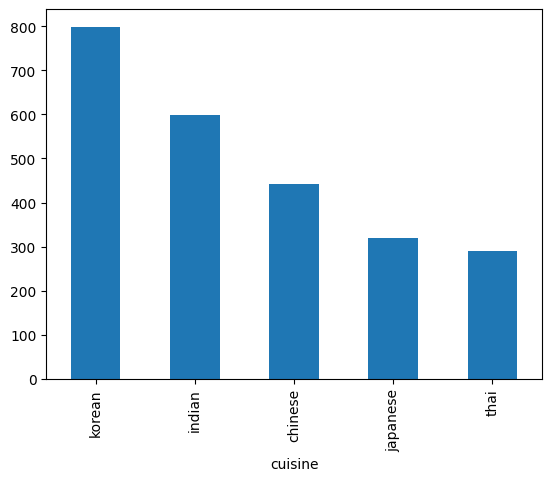

In [275]:
data.cuisine.value_counts().plot.bar()

In [276]:
indian = data[data.cuisine == 'indian']
thai = data[data.cuisine == 'thai']
chinese = data[data.cuisine == 'chinese']
japanese = data[data.cuisine == 'japanese']
korean = data[data.cuisine == 'korean']

In [277]:
print('korean:',korean.shape,'\n','indian:',indian.shape,'\n','chinese:',chinese.shape,'\n','thai:',thai.shape,'\n','japanese:',japanese.shape)

korean: (799, 385) 
 indian: (598, 385) 
 chinese: (442, 385) 
 thai: (289, 385) 
 japanese: (320, 385)


In [278]:
def create_ingredient_df(df):
    ingredient_df = data.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

In [279]:
#this is the function which i have created of my understading which is  similar to above function
def ingre(data):
  data = data.T.drop(['cuisine','Unnamed: 0'],axis = 0).sum(axis = 1).to_frame('total')
  data = data[(data.T != 0).any()]
  data.sort_values(by = 'total',ascending = False,inplace = True)
  return data

In [280]:
indian_ingre = ingre(indian)
thai_ingre = ingre(thai)
japanese_ingre = ingre(japanese)
chinese_ingre = ingre(chinese)
korean_ingre = ingre(korean)

<Axes: >

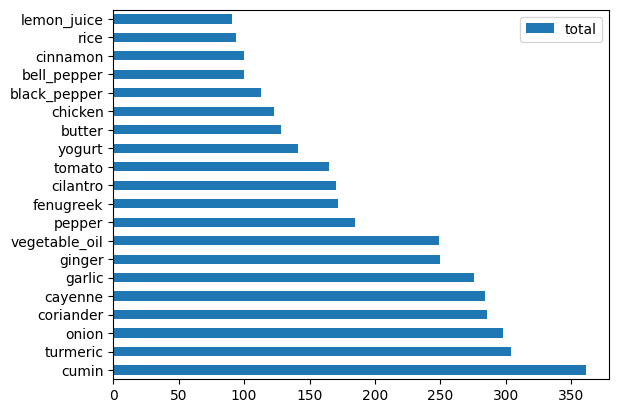

In [336]:
#now lets plot the ingredients of the five countries
indian_ingre.head(20).plot.barh()

cumin,turmeric,onion,coriender,cayenne,garlic,ginger are the most incredients used in any kind of Indian food.

<Axes: >

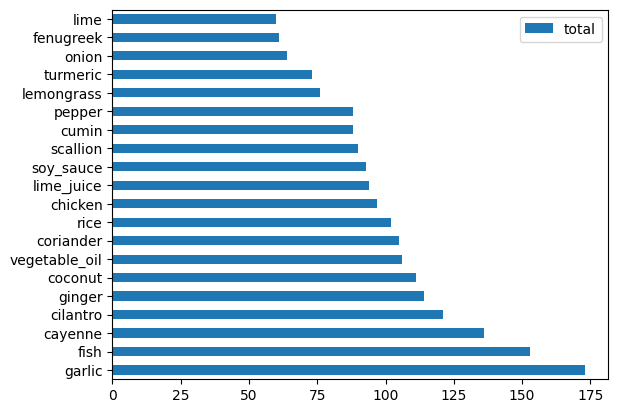

In [337]:
thai_ingre.head(20).plot.barh()

garlic,fish,cayenne,cilantro,cocnut are commonly used food ingredients.

<Axes: >

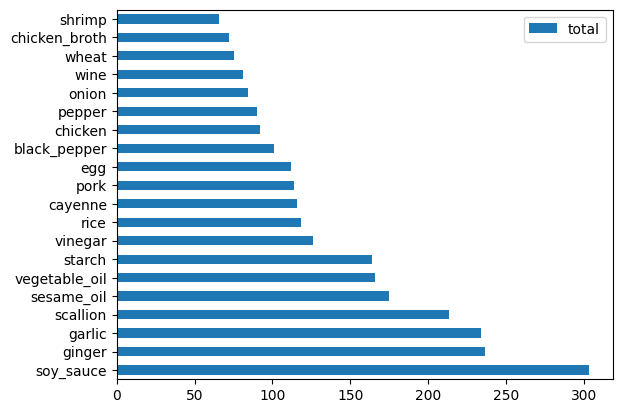

In [338]:
chinese_ingre.head(20).plot.barh()

<Axes: >

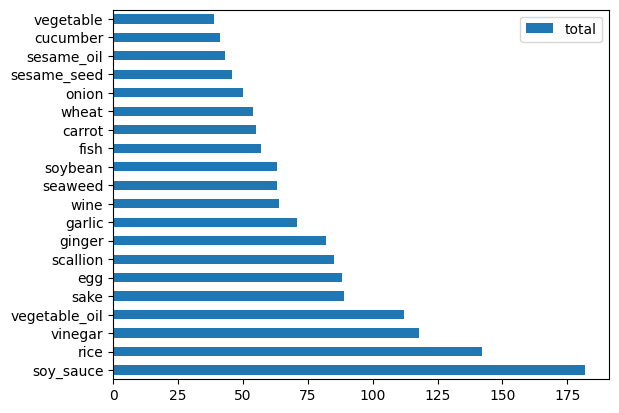

In [286]:
japanese_ingre.head(20).plot.barh()

<Axes: >

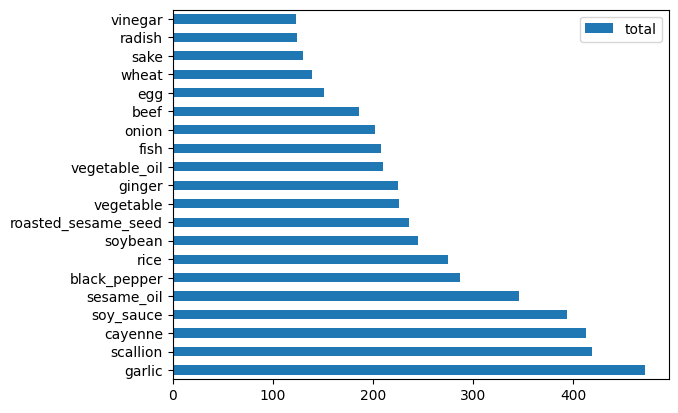

In [287]:
korean_ingre.head(20).plot.barh()

In [339]:
#ginger,garlice,rice are common in food all five countries in the dataset so we will remove them from the dataset.
feature_df = data.drop(['Unnamed: 0','cuisine','ginger','garlic','rice'],axis = 1)
label = data.cuisine

In [289]:
feature_df.head()


almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

<Axes: xlabel='cuisine'>

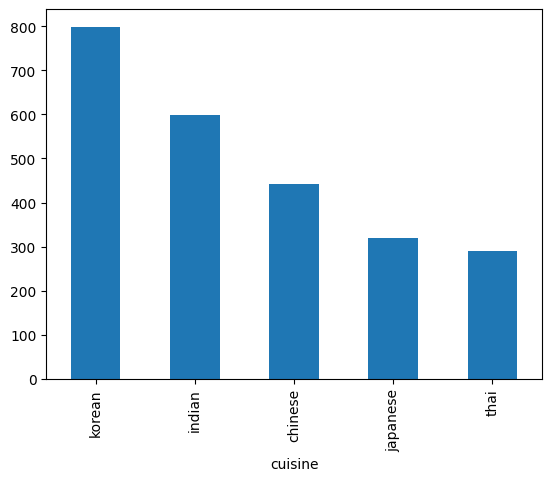

In [290]:
label.value_counts().plot.bar()

In [292]:
class_counts = label.value_counts()
min_samples = class_counts.min()
oversample = SMOTE(k_neighbors = min(min_samples - 1,5))
t_feature,t_label = oversample.fit_resample(feature_df,label)
t_feature = pd.DataFrame(t_feature)
t_label = pd.DataFrame(t_label)

In [293]:
print('new label count:',t_label.value_counts())

new label count: cuisine 
chinese     799
indian      799
japanese    799
korean      799
thai        799
Name: count, dtype: int64


In [294]:
print('old label count:',data.cuisine.value_counts())

old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [295]:
joined = pd.concat([t_feature,t_label],axis = 1,join = 'outer')
joined.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  white_bread  white_wine  \
0         0          0          0  ...            0           0   
1         0          0          0  ...            0           0   
2         0          0          0  ...            0           0   
3         0          0          0  ...            0           0   
4         0          0          0  ...            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  cuisine  
0                        0     0     0    0      0       0         0   indian  
1                        0     0     0    0      0       0         0   indian  
2                        0     0     0    0      0       0         0   indian  
3                        0     0     0    0      0       0         0   indian  
4                        0     0     0    0      0       1         0   indian  

[5 rows x 381 columns]

In [296]:
joined.info()
joined.to_csv('clean_cuisine.csv')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, almond to cuisine
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [297]:

clean = joined

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np



In [299]:
cuisine_data = clean['cuisine']

In [300]:
cuisine_data.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [301]:
cuisine_data

0       indian
1       indian
2       indian
3       indian
4       indian
         ...  
3990      thai
3991      thai
3992      thai
3993      thai
3994      thai
Name: cuisine, Length: 3995, dtype: object

In [302]:
features = clean.drop(['cuisine'],axis = 1)

In [303]:
features.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

In [304]:
X_train,X_test,y_train,y_test = train_test_split(features,cuisine_data,test_size = 0.3)

In [305]:
lr = LogisticRegression(multi_class = 'ovr',solver = 'liblinear')
model = lr.fit(X_train,np.ravel(y_train))
accuracy = model.score(X_test,y_test)
print('accuracy of our model:',accuracy*100)

accuracy of our model: 80.56713928273561


In [306]:
lr = LogisticRegression(multi_class = 'ovr',solver = 'lbfgs')
model = lr.fit(X_train,np.ravel(y_train))
accuracy = model.score(X_test,y_test)
print('accuracy of our model:',accuracy*100)

accuracy of our model: 80.4837364470392


In [307]:
print(f'ingredients: {X_test.iloc[60][X_test.iloc[60]!=0].keys()}')
print(f'cuisine: {y_test.iloc[60]}')

ingredients: Index(['cashew', 'cayenne', 'coriander', 'cumin', 'fenugreek', 'lime_juice',
       'mustard', 'pepper', 'tamarind', 'turmeric', 'vegetable_oil', 'yogurt'],
      dtype='object')
cuisine: indian


In [309]:
print(f'ingredients: {X_test.iloc[150][X_test.iloc[150]!=0].keys()}')
print(f'cuisine: {y_test.iloc[150]}')

ingredients: Index(['sake', 'soy_sauce'], dtype='object')
cuisine: japanese


In [311]:
print(f'ingredients: {X_test.iloc[15][X_test.iloc[15]!=0].keys()}')
print(f'cuisine: {y_test.iloc[15]}')

ingredients: Index(['bean', 'cilantro', 'fish', 'roasted_peanut', 'tomato',
       'vegetable_oil'],
      dtype='object')
cuisine: thai


In [332]:
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

     chinese       0.77      0.75      0.76       240
      indian       0.90      0.90      0.90       241
    japanese       0.77      0.74      0.75       251
      korean       0.79      0.77      0.78       224
        thai       0.79      0.86      0.83       243

    accuracy                           0.80      1199
   macro avg       0.80      0.80      0.80      1199
weighted avg       0.80      0.80      0.80      1199

